## Capstone project
* Goals
  * Data extraction
      * Download a publicly available dataset. 
      * Describe the dataset 
      * Describe what question you intend to answer with the dataset
  * Data cleanup
      * Write a script/function to clean up the dataset. 
      * This might involve
        - cleaning up columns
        - removing/filling missing data
  * Data visualization
      * Visualize important dimensions of the data
      * Outline a few trends you can see 
  * Descriptive/Predictive analytics
      * Draw conclusions from the data
          * This can based on descriptive statistics and/or visualization
          * Predictive models (preferred) and carries 10 extra points.public
 

### Open datasets
          
* Resources for open data
  * https://data.boston.gov/
  * https://www.data.gov/
  * https://www.bls.gov/data/
  * http://www.fao.org/statistics/databases/en/
  * http://ec.europa.eu/eurostat/web/main
  * https://github.com/awesomedata/awesome-public-datasets
  * https://www.kdnuggets.com/2016/05/top-10-datasets-github.html
  * https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public

In [112]:
import pandas as pd
import numpy as np

In [113]:
from collections import Counter
import collections

# Data extraction

In [114]:
df = pd.read_csv('titanic.csv')

In [115]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 12 variables and 891 recode in this dataset, that include the pesseger information of pessenger ID, Survival, Class, Name, Sex, Age,Number of spouses on board, Number of parents/children on board,Ticket number, Ticket prices, Cabin number, and Port of embarkation.

With those information, we can analyze the survived of each group of passenger and then find the probability of surviving any passenger in the Titanic.

## So the question is: Which group of passengers have a higher probability of surviving?

# Data cleanup

In [117]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [118]:
#Cabin have too much missing value that we may delete it directly.
df1 = df.drop(['Cabin'], axis=1)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [119]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [120]:
#we use the random numbers between (mean - std) & (mean + std) of age to fill up the missing value of age.
rand = np.random.randint(df1['Age'].mean() - df1['Age'].std(), df1['Age'].mean() + df1['Age'].std(), size = 177)
df1["Age"][np.isnan(df1["Age"])] = rand

<ipython-input-120-b9fbab37da46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age"][np.isnan(df1["Age"])] = rand


In [121]:
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [310]:
#we delete the row have missing Embarked
df2 = df1.dropna(axis=0,how='any')

In [311]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [312]:
#marge SibSp and Parch into family size.
tempa = np.array(df2['SibSp'])
tempb = np.array(df2['Parch'])
aaaaaa = tempa + tempb + 1
aaaaaa = aaaaaa.tolist()
df2['familysize'] = aaaaaa
df2

<ipython-input-312-18f209de4877>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['familysize'] = aaaaaa


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,34.0,1,2,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


the dataset has no missing value and has been clean up.

# Data visualization

In [124]:
import matplotlib.pyplot as plt

In [125]:
p1a = Counter(df2['Age']).most_common()
p1a = pd.DataFrame(p1a,columns=['age','number'])
p1a = p1a.sort_values(by="age" , ascending=True)
p1a

,age,number
85,0.42,1
84,0.67,1
68,0.75,2
58,0.83,2
80,0.92,1
...,...,...
70,70.00,2
74,70.50,1
60,71.00,2
87,74.00,1


In [302]:
p1s = df2.loc[(df2['Survived']==1)]
p1s = Counter(p1s['Age']).most_common()
p1s = pd.DataFrame(p1s,columns=['age','snumber'])
p1s = p1s.sort_values(by="age" , ascending=True)
p1s

,age,snumber
63,0.42,1
61,0.67,1
49,0.75,2
41,0.83,2
56,0.92,1
...,...,...
36,58.00,3
47,60.00,2
58,62.00,1
46,63.00,2


In [303]:
result = pd.merge(p1a, p1s,how='left', on=['age'])
result.fillna(0, inplace=True)
tempa = np.array(result['number'])
tempb = np.array(result['snumber'])
aaaaaa = tempa - tempb
aaaaaa = aaaaaa.tolist()
result['dnumber'] = aaaaaa
result

,age,number,snumber,dnumber
0,0.42,1,1.0,0.0
1,0.67,1,1.0,0.0
2,0.75,2,2.0,0.0
3,0.83,2,2.0,0.0
4,0.92,1,1.0,0.0
...,...,...,...,...
83,70.00,2,0.0,2.0
84,70.50,1,0.0,1.0
85,71.00,2,0.0,2.0
86,74.00,1,0.0,1.0


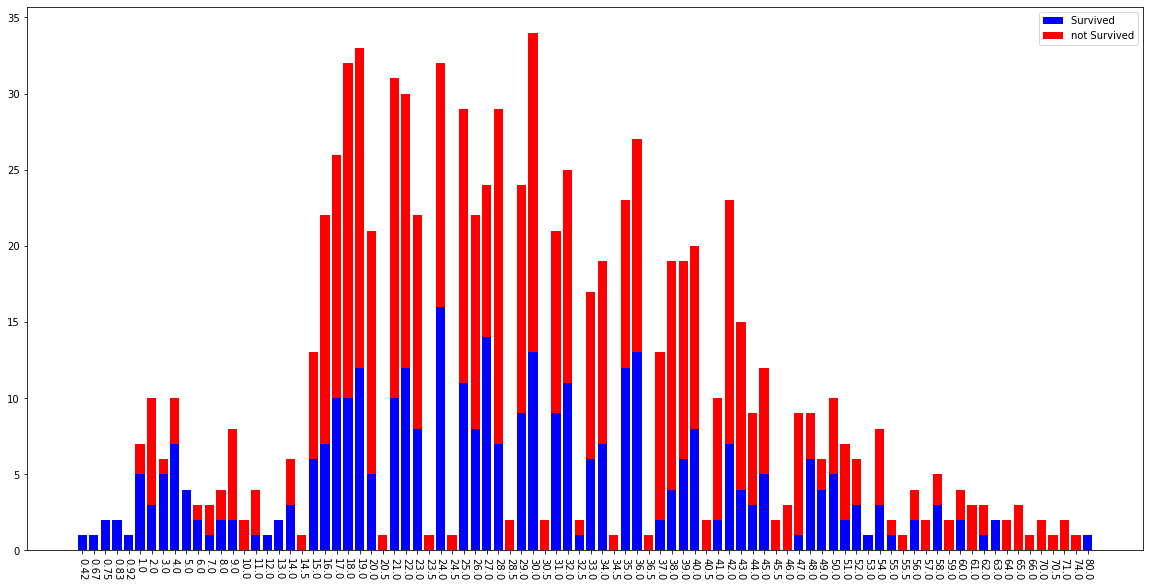

In [304]:
name_list = result['age'].tolist()
num_list = result['snumber'].tolist()
num_list1 = result['dnumber'].tolist()
plt.figure(figsize=(20,10))
plt.bar(range(len(num_list)), num_list, label='Survived ',fc = 'b')
plt.bar(range(len(num_list)), num_list1, bottom=num_list, label='not Survived',tick_label = name_list,fc = 'r')
plt.xticks(rotation=-90) 
plt.legend()
plt.show()

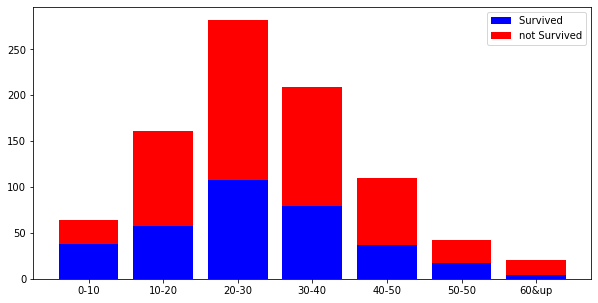

In [306]:
age_groups = pd.cut(result['age'], bins=[0,10,20,30,40,50,60,np.inf])
result1 = result.groupby(age_groups).sum()
name_list = ['0-10','10-20','20-30','30-40','40-50','50-50','60&up']
num_list = result1['snumber'].tolist()
num_list1 = result1['dnumber'].tolist()
plt.figure(figsize=(10,5))
plt.bar(range(len(num_list)), num_list, label='Survived ',fc = 'b')
plt.bar(range(len(num_list)), num_list1, bottom=num_list, label='not Survived',tick_label = name_list,fc = 'r')
plt.legend()
plt.show()

Whether most of the passengers are around 30 years old, and the survival rate of 0-10 is higher than other age groups.

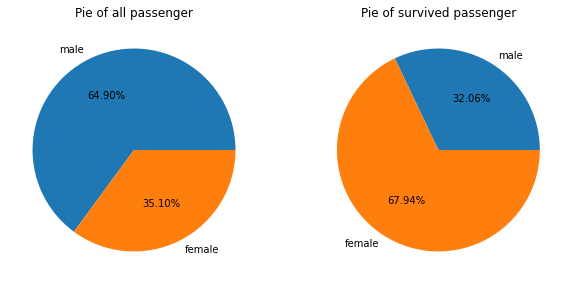

In [153]:
p2 = Counter(df2['Sex']).most_common()
p2 = pd.DataFrame(p2,columns=['Sex','number'])
p2s = df2.loc[(df2['Survived']==1)]
p2s = Counter(p2s['Sex']).most_common()
p2s = pd.DataFrame(p2s,columns=['Sex','snumber'])
result = pd.merge(p2, p2s, on=['Sex'])

x = result['Sex'].tolist()
y1= result['number'].tolist()
y2= result['snumber'].tolist()

plt.figure(figsize=(10, 15))
plt.subplot(221)
plt.pie(x=y1, labels= x, autopct='%1.2f%%')
plt.title('Pie of all passenger')
plt.subplot(222)
plt.pie(x=y2, labels= x, autopct='%1.2f%%')
plt.title('Pie of survived passenger')
plt.show()

Males make up the majority of all passengers, but females make up the majority of surviving passengers.

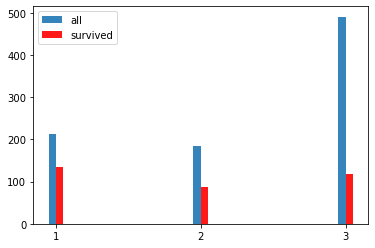

In [170]:
p3 = Counter(df2['Pclass']).most_common()
p3 = pd.DataFrame(p3,columns=['Class','number'])
p3 = p3.sort_values(by="Class" , ascending=True)
p3s = df2.loc[(df2['Survived']==1)]
p3s = Counter(p3s['Pclass']).most_common()
p3s = pd.DataFrame(p3s,columns=['Class','snumber'])
result = pd.merge(p3, p3s, on=['Class'])

x1 = result['Class'].tolist()
y1= result['number'].tolist()
y2= result['snumber'].tolist()

x = np.arange(len(x1))
width = 0.05
fig,ax = plt.subplots()
ax.bar(x,y1,width,alpha = 0.9, label='all')
ax.bar(x+width,y2,width,alpha = 0.9,color= 'red',label='survived')
ax.set_xticks(x +width/2)
ax.set_xticklabels(x1)
plt.legend()
plt.show()

More than half of all passengers are in the lower class, and the upper class has the most surviving passengers.The survival probability of Upper level is greater than that of Middle and lower. The better the level, the better the survival probability.

In [270]:
p4 = Counter(df2['Embarked']).most_common()
p4 = pd.DataFrame(p4,columns=['Embarked','number'])
p4s = df2.loc[(df2['Survived']==1)]
p4s = Counter(p4s['Embarked']).most_common()
p4s = pd.DataFrame(p4s,columns=['Embarked','snumber'])
result = pd.merge(p4, p4s, on=['Embarked'])


In [271]:
tempa = np.array(result['number'])
tempb = np.array(result['snumber'])
aaaaaa =tempb/tempa
aaaaaa = aaaaaa.tolist()
result['percentage'] = aaaaaa
result

,Embarked,number,snumber,percentage
0,S,644,217,0.336957
1,C,168,93,0.553571
2,Q,77,30,0.389610


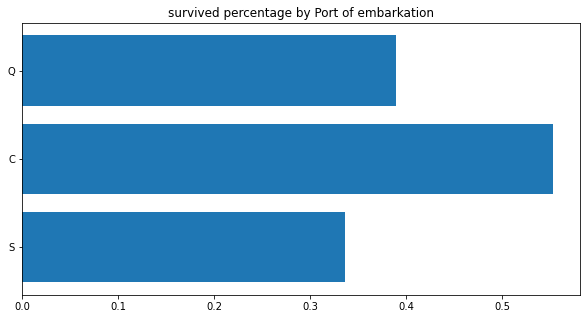

In [279]:
x = result['Embarked']
y = result['percentage']

plt.figure(figsize=(10,5))
plt.title('survived percentage by Port of embarkation')
plt.barh(x, y)
plt.show()

The passengers embarkated on C port have a higher survived percentage then other.

In [313]:
p5 = Counter(df2['familysize']).most_common()
p5 = pd.DataFrame(p5,columns=['familysize','number'])
p5s = df2.loc[(df2['Survived']==1)]
p5s = Counter(p5s['familysize']).most_common()
p5s = pd.DataFrame(p5s,columns=['familysize','snumber'])
result = pd.merge(p5, p5s, how='left',on=['familysize'])
result.fillna(0, inplace=True)
tempa = np.array(result['number'])
tempb = np.array(result['snumber'])
aaaaaa = tempb / tempa
aaaaaa = aaaaaa.tolist()
result['percentage'] = aaaaaa
result.sort_values(by="familysize" , ascending=True)

,familysize,number,snumber,percentage
0,1,535,161.0,0.300935
1,2,161,89.0,0.552795
2,3,102,59.0,0.578431
3,4,29,21.0,0.724138
5,5,15,3.0,0.200000
4,6,22,3.0,0.136364
6,7,12,4.0,0.333333
8,8,6,0.0,0.000000
7,11,7,0.0,0.000000


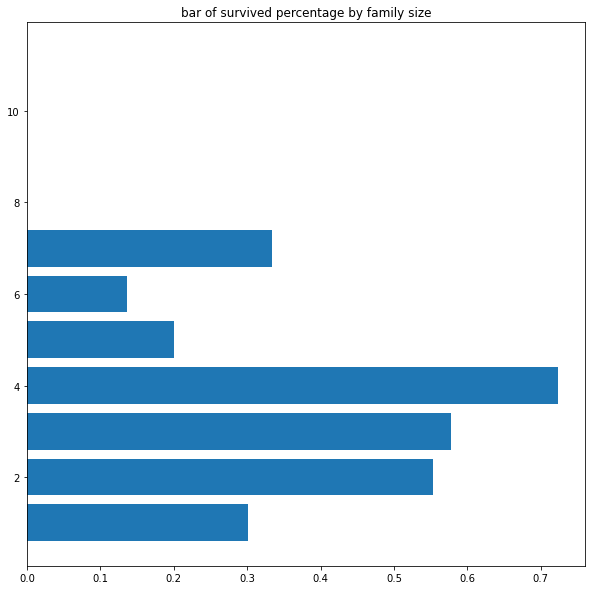

In [318]:
x = result['familysize'].tolist()
y1= result['percentage'].tolist()

plt.figure(figsize=(10, 10))
plt.barh(x, y1)
plt.title('bar of survived percentage by family size')
plt.show()

The passengers with 3 people on his family has a higher survived percentage.

# Descriptive/Predictive analytics

We can clearly see that the group with highest survived percentage is age of 0-10, female,in upper class , embarkated on C port, with 3 people on her family. 

In [340]:
df2["AgeGroup"]=pd.cut(df2["Age"],bins=[0,10,20,30,40,50,np.inf])
df2.pivot_table(values="Survived",index="AgeGroup",columns=["Sex","Pclass","Embarked"],aggfunc=np.mean)

<ipython-input-340-021830e35cd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["AgeGroup"]=pd.cut(df2["Age"],bins=[0,10,20,30,40,50,np.inf])


Sex             female                                                         \
Pclass               1                   2                        3             
Embarked             C    Q         S    C    Q         S         C         Q   
AgeGroup                                                                        
(0.0, 10.0]        NaN  NaN  0.000000  1.0  NaN  1.000000  0.833333       NaN   
(10.0, 20.0]  1.000000  NaN  1.000000  1.0  NaN  1.000000  0.444444  0.833333   
(20.0, 30.0]  1.000000  NaN  0.928571  1.0  1.0  0.869565  1.000000  0.769231   
(30.0, 40.0]  1.000000  1.0  1.000000  NaN  NaN  0.941176  0.666667  0.428571   
(40.0, 50.0]  0.888889  NaN  1.000000  NaN  NaN  0.909091  0.000000  1.000000   
(50.0, inf]   1.000000  NaN  1.000000  NaN  NaN  0.666667       NaN       NaN   

Sex                         male                                               \
Pclass                         1                   2                        3   
Embarked             S         C    Q         S    C    Q         S         C   
AgeGroup                                                                        
(0.0, 10.0]   0.375000       NaN  NaN  1.000000  1.0  NaN  1.000000  1.000000   
(10.0, 20.0]  0.312500  0.250000  NaN  0.166667  1.0  NaN  0.090909  0.363636   
(20.0, 30.0]  0.419355  0.461538  NaN  0.583333  0.0  NaN  0.032258  0.214286   
(30.0, 40.0]  0.500000  0.500000  NaN  0.360000  0.0  NaN  0.120000  0.153846   
(40.0, 50.0]  0.000000  0.500000  0.0  0.352941  NaN  NaN  0.090909  0.000000   
(50.0, inf]   1.000000  0.222222  NaN  0.176471  NaN  0.0  0.090909       NaN   

Sex                            
Pclass                         
Embarked          Q         S  
AgeGroup                       
(0.0, 10.0]   0.000  0.411765  
(10.0, 20.0]  0.125  0.100000  
(20.0, 30.0]  0.200  0.115789  
(30.0, 40.0]  0.000  0.132075  
(40.0, 50.0]  0.000  0.090909  
(50.0, inf]   0.000  0.000000

Try to bulid a predict model for predicting the survived percentage of a passenger.

In [389]:
#We ignore the variable of Name, Ticket.
df3 = df2.drop(['Name','Ticket','AgeGroup'],axis=1)
df3['Sex'] = df3['Sex'].map({'female': 0, 'male': 1} ).astype(int)
df3['Embarked'] = df3['Embarked'].map({'C': 0, 'S': 1 , 'Q' : 2} ).astype(int)

#then use 80% of data as trian data and 20% as testing data.

from sklearn.model_selection import train_test_split

train, test = train_test_split(df3, test_size=0.2)
xtrain = train.drop("Survived",axis=1)
ytrain = train["Survived"]
xtest  = test.drop("Survived",axis=1)
ytest = test["Survived"]

In [398]:
#use Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=10)

In [400]:
ypred = random_forest.predict(xtest)
acc = random_forest.score(xtest, ytest)
print("The accuracy of the random forest algorithm is",acc)

The accuracy of the random forest algorithm is 0.8426966292134831


The predict model don't have a high accuracy that may becouse of the data set is not large engouh.